# 1D Heat Diffusion PDE: 2nd derivative, numerical domain of dependence and range of influence, accuracy, von Neumann Stability Analysis, Stability

Recall that the heat diffusion eq is a parabolic PDE (and is thus solved via initial conditions and stepping forward via time slices).

Lessons we learn from solving this equation will be applicable to similar equations, such as the Schrödinger equation, Black Scholes, Random Walk, and Brownian motion. 

The equation is this (with $\sigma>0$):

$\frac{\partial u}{\partial t}=\sigma \frac{\partial ^2 u}{\partial x^2}$

and we will be solving it with the following scheme. Let $\delta x$ and $\delta t$ be the mesh spacing and upper and lower indices indicate time and space indices, respectively.

$\frac{u^{n+1}_i-u^n_i}{\delta t}=\sigma \frac{u^n_{i+1}-2u^n_{i}+u^n_{i-1}}{\delta x^2}$

Note 2 things: 
1. The scheme for the time partial derivative is __forward difference__ so is $O(\delta t)$ while the scheme for the space partial derivative is $O(\delta x^2)$
2. We have n indexes on the RHS, so this is an explicit scheme

(We can derive the 2nd partial derivative via taylor series. It is relatively simple so shall be omitted from these notes)

Numerical domain of dependence and range of influence is relatively simple.

So a calculating a point $u^{n+1}_i$ only depends on the points $\{u^n_{i+1},u^n_{i},u^n_{i-1} \}$ and perturbing a point $u^{n+1}_i$ only directly influences points $\{u^{n+1}_{i+1},u^{n+1}_{i},u^{n+1}_{i-1} \}$

This Finite Difference Approximation thus does VERY DIFFERENT THINGS from the Partial Differential Equation since the FDA has finite (and relatively small) ranges of influence/domain of dependence, whereas PDE is infinite range

In terms of error, you must both decrease $\delta x$ and $\delta t$ simultaneously in order for the numerical solution to converge to the analytic one!

__For Linear PDEs with well posed initial and boundary conditions, stability is a necessary and sufficient condition for convergence__

Von Neumann Stability analysis works w initial value problems with slowly varying or constant coefficients. Essentially how it works if that you decompose each term in the scheme into a Fourier mode. This gets us a the following amplification factor (after algebra):

$\lambda = 1-4\mu sin^2(\frac{k\delta x}{2})$

where $\mu=\frac{\sigma \delta t}{\delta x ^2}$ and $k$ is the wavenumber for the fourier mode

for the true PDE it is:

$\lambda = e^{-\mu(k\delta x)^2}$

which, note, is less than or equal to 1 for all wave numbers! So the true PDE dictates that the magnitude is less than or equal to 1 for all solutions.

So $|1-4\mu sin^2(\frac{k\delta x}{2})|\leq 1$

So if positive, $\mu\geq0$
and if negative $\mu sin^2(\frac{k\delta x}{2})\leq \frac{1}{2}$ so we need $\mu\leq \frac{1}{2}$

So substituting we get our stability condition for the 1D Heat Diffusion Time Explicit Scheme:

$\delta t \leq \frac{\delta x^2}{2\sigma}$

Note that $\frac {\delta x^2}{\sigma}$ is the Characteristic Diffusion Time! 

So this Stability Condition enforces that the time step is slower than the physical diffusion accross $\delta x$, which makes sense physically as well!

Generally wrt the amplification factor, large wavelengths (and thus small wavenumbers) are captured very well by a small enough $\mu$. If $\mu$ is too big, then the FDA amplification factor deviates for a larger amount of wavelengths

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
ul=0 #Boundary condition at x=xi
ur=0 #Boundary condition at x=xf
sigma=0.5#Set sigma
mu=0.5009#Set value of (sigma*dt)/(dx^2)

xi=0 #Left Boundary
xf=1 #Right Boundary
dx=0.02 #step size x

ti=0 #Initial time
tf=0.05 #Final time
dt=dx**2*mu/sigma #step size in t is fixed by step size in x, mu, and sigma

x=np.arange(xi,xf,dx) #Create mesh
t=np.arange(ti,tf,dt) #

Text(0, 0.5, 'u')

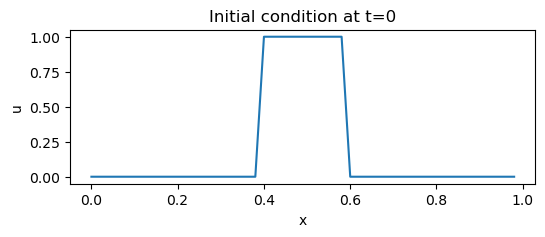

In [14]:
u=np.zeros((len(t),len(x))) #Create solution of size (length(t),length(x))

#Set initial condition
#u=1 for x between 0.4 and 0.6
u[0,int(1/dx*0.4):int(1/dx*0.6)]=1


#Set boundary condition for left and right spatial boundary
u[:,0]=ul
u[:,u.shape[1]-1]=ur

#Plot

fig=plt.figure(figsize=(6,2))
plt.plot(x,u[0])
plt.title('Initial condition at t=0')
plt.xlabel('x')
plt.ylabel('u')

In [15]:
for k in range(1,len(t)): #Loop over t slices
    for i in range(1,len(x)-1): #Loop over x slices but exclude boundaries
        u[k,i]=u[k-1,i]+mu*(u[k-1,i+1]-2*u[k-1,i]+u[k-1,i-1]) #Execute scheme

In [16]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'u')

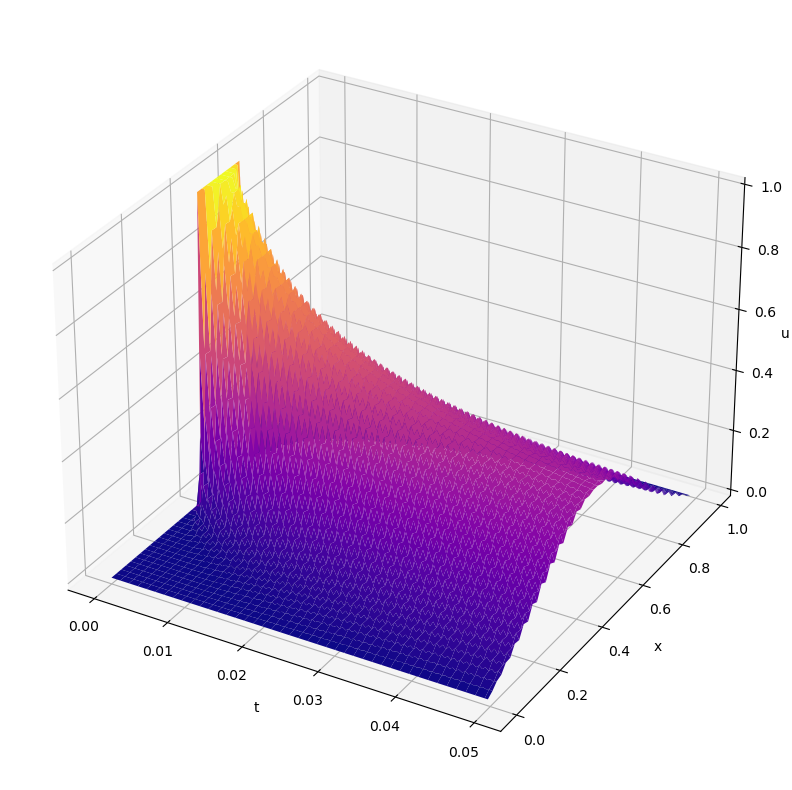

In [19]:
#Plot in 3D

fig=plt.figure(figsize=(14,10))
ax=plt.axes(projection='3d')

X,T=np.meshgrid(x,t)

surf=ax.plot_surface(T,X,u,cmap=plt.cm.plasma)

ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_zlabel('u',labelpad=0)